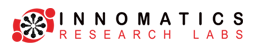

### 1. Importing the relevant libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# CODE HERE
import warnings
warnings.filterwarnings('ignore')

### 2. Loading the raw data

#### Load the data from a .csv in the same folder

In [4]:

df = pd.read_csv("linear.csv.csv")

#### Let's explore the top 5 rows of the df


In [5]:

df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [6]:
df.rename(columns = {"Engine Type":"Engine_Type"})

,Brand,Price,Body,Mileage,EngineV,Engine_Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


## Preprocessing

### 3. Exploring the descriptive statistics of the variables
-  Descriptive statistics are very useful for initial exploration of the variables
- By default, only descriptives for the numerical variables are shown
- To include the categorical ones, you should specify this with an argument

In [7]:

df.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [8]:
df.describe(include = "object")

,Brand,Body,Engine Type,Registration,Model
count,4345,4345,4345,4345,4345
unique,7,6,4,2,312
top,Volkswagen,sedan,Diesel,yes,E-Class
freq,936,1649,2019,3947,199


### Dealing with missing values

#### 4. Find the missing values from the data if any
- data.isnull() # shows a df with the information whether a data point is null. 
- Since True = the data point is missing, while False = the data point is not missing, we can sum them.
- This will give us the total number of missing values feature-wise.

In [9]:

df.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

#### 5. Let's simply drop all missing values
Note: This is not always recommended, however, when we remove less than 5% of the data, it is okay

In [10]:

df = df.dropna()

In [11]:
df.shape

(4025, 9)

In [12]:
df.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

#### 6. Let's check the descriptives without the missing values


In [13]:
df.describe(include = "object")

,Brand,Body,Engine Type,Registration,Model
count,4025,4025,4025,4025,4025
unique,7,6,4,2,306
top,Volkswagen,sedan,Diesel,yes,E-Class
freq,880,1534,1861,3654,188


In [14]:

df.describe()

,Price,Mileage,EngineV,Year
count,4025.000000,4025.000000,4025.000000,4025.000000
mean,19552.308065,163.572174,2.764586,2006.379627
std,25815.734988,103.394703,4.935941,6.695595
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,90.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21900.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


### Exploring the PDFs for Numerical Variables in the DataFrame

#### 7. A great step in the data exploration is to display the probability distribution function (PDF) of a variable
- The PDF will show us how that variable is distributed 
- This makes it very easy to spot anomalies, such as outliers
- The PDF is often the basis on which we decide whether we want to transform a feature

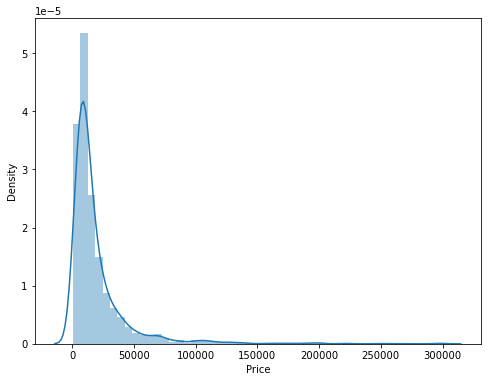

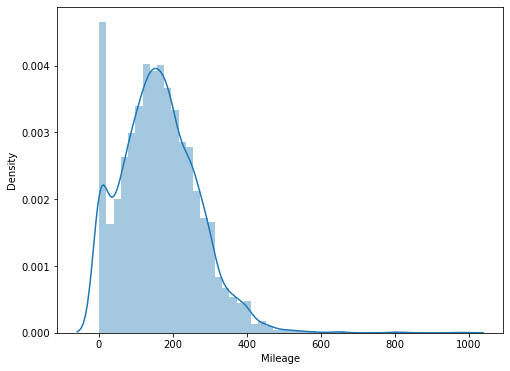

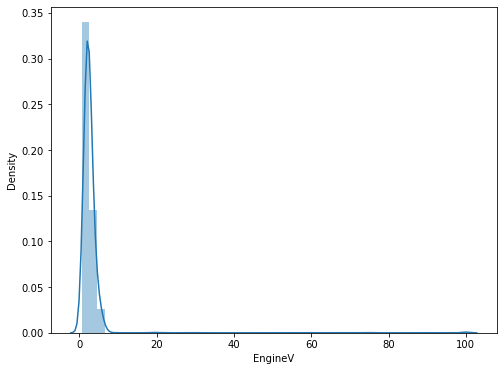

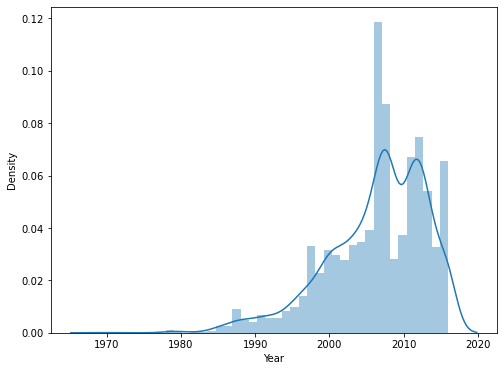

In [15]:

col = ["Price","Mileage","EngineV","Year"]
for i in col:
    plt.figure(figsize = (8,6))
    sns.distplot(df[i])
    plt.show()

### Dealing with outliers
Hint: Use IQR or Z Score

#### 8A. Identify the Outliers which are presented in `Price` Column

In [16]:

Q1 = df.Price.quantile(0.25)
Q3 = df.Price.quantile(0.75)
Q1,Q3
IQR = Q3-Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(lower_limit,upper_limit)

-15352.5 44251.5


#### 8B. Remove the Outliers which are presented in `Price` Column

In [17]:

df1 = df[df.Price <= upper_limit]
df.shape[0]-df1.shape[0]

355

#### 8C. Again Check the Distribution for `Price` Column and say something about distribution plot

13338.79520708447

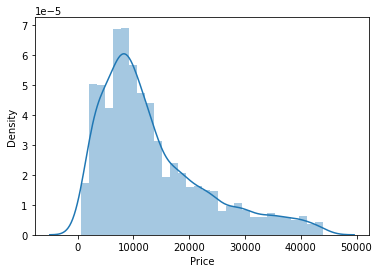

In [136]:

sns.distplot(df1.Price)

### After removing outliers price column is normally distributed

#### 9A. Same identify and remove the outliers in `Milage` column

In [19]:

Q1 = df1.Mileage.quantile(0.25)
Q3 = df1.Mileage.quantile(0.75)
Q1,Q3
IQR = Q3-Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(lower_limit,upper_limit)
df2 = df1[df.Mileage <= upper_limit]
df1.shape[0]-df2.shape[0]

-87.0 433.0


39

#### 9B. Check the distribution after deleting the outliers in `milage` column and say something about distribution.

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

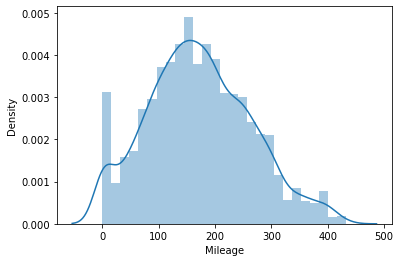

In [20]:

sns.distplot(df2.Mileage)

### After removing outliers mileage column is normally distributed 


#### 10A. Identify and remove the outliers from `EngineV` column



In [21]:

Q1 = df1.EngineV.quantile(0.25)
Q3 = df1.EngineV.quantile(0.75)
Q1,Q3
IQR = Q3-Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
df3 = df2[df.EngineV <= upper_limit]
df2.shape[0]-df3.shape[0]

212

In [22]:

df3.shape

(3419, 9)

#### 10B. Ckeck the distribution plot after deleting the outliers and say something about it.

<AxesSubplot:xlabel='EngineV', ylabel='Density'>

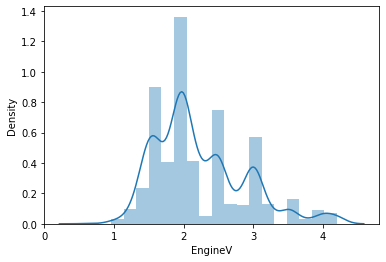

In [23]:

sns.distplot(df3.EngineV,bins = 20)

### After removing outliers EngineV column is normally distributed 


In [24]:
df3.drop("Model",axis = 1,inplace = True)

#### 10C. Perform Lable & One-Hot Encoding For the Categorical Variable

In [25]:

cat_col = df3.loc[:,df3.dtypes==np.object]
num_col = df3.loc[:,~(df3.dtypes==np.object)]

In [26]:
cat_col 

,Brand,Body,Engine Type,Registration
0,BMW,sedan,Petrol,yes
1,Mercedes-Benz,van,Diesel,yes
3,Audi,crossover,Petrol,yes
4,Toyota,crossover,Petrol,yes
7,Audi,vagon,Diesel,yes
...,...,...,...,...
4338,Volkswagen,van,Diesel,yes
4339,Toyota,sedan,Petrol,yes
4341,BMW,sedan,Petrol,yes
4342,BMW,sedan,Petrol,yes


In [57]:
df4 = pd.get_dummies(cat_col)

In [58]:

df5 = pd.concat([num_col, df4], axis=1)

In [59]:
df5.shape

(3419, 23)

### Multicollinearity

#### 11A. Say about Multicollinearity and Find the Multicollinearity variables in the Dataset. 


In [60]:

X.corr()

,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
Mileage,1.000000,0.152230,-0.621586,0.119609,0.192166,-0.104992,-0.070080,-0.208443,-0.032237,-0.115075,-0.006270,0.062877,0.079636,0.121432,0.059478,-0.005059,-0.245465,-0.241823
EngineV,0.152230,1.000000,-0.109634,0.183581,0.161249,0.004681,-0.332464,0.147053,-0.247092,-0.290982,0.015949,0.032931,-0.111404,-0.163453,0.153008,-0.055447,-0.099893,-0.046303
Year,-0.621586,-0.109634,1.000000,-0.161648,-0.115794,0.028604,0.146790,0.127380,0.065444,-0.030424,0.014918,-0.189722,-0.023614,0.102250,-0.133128,0.000685,-0.009001,0.238013
Brand_BMW,0.119609,0.183581,-0.161648,1.000000,-0.177091,-0.123945,-0.151683,-0.152480,-0.225001,-0.088355,-0.012223,0.205278,-0.029027,-0.180632,-0.051779,-0.038588,0.108098,-0.140754
Brand_Mercedes-Benz,0.192166,0.161249,-0.115794,-0.177091,1.000000,-0.139439,-0.170644,-0.171540,-0.253127,-0.078009,0.091117,0.048364,-0.108011,0.098943,-0.032340,0.005145,-0.131251,-0.012056
Brand_Mitsubishi,-0.104992,0.004681,0.028604,-0.123945,-0.139439,1.000000,-0.119433,-0.120060,-0.177162,-0.020150,-0.020663,-0.000681,-0.082754,-0.125876,0.181757,-0.019271,0.074160,0.073065
Brand_Renault,-0.070080,-0.332464,0.146790,-0.151683,-0.170644,-0.119433,1.000000,-0.146929,-0.216810,0.015575,-0.031227,-0.204953,0.159273,0.260760,-0.105375,0.013819,-0.154384,0.061723
Brand_Toyota,-0.208443,0.147053,0.127380,-0.152480,-0.171540,-0.120060,-0.146929,1.000000,-0.217949,0.073719,-0.035216,0.027358,-0.100625,-0.158757,0.176123,0.024102,0.146907,0.119802
Brand_Volkswagen,-0.032237,-0.247092,0.065444,-0.225001,-0.253127,-0.177162,-0.216810,-0.217949,1.000000,0.111627,0.018389,-0.115257,-0.005526,0.177415,-0.086191,-0.008094,-0.034510,0.044300
Body_hatch,-0.115075,-0.290982,-0.030424,-0.088355,-0.078009,-0.020150,0.015575,0.073719,0.111627,1.000000,-0.093174,-0.231085,-0.100450,-0.130884,-0.025532,0.049052,0.158295,0.004512


#### 11B. Show the variables which are having Multicollinearity.

Hint: VIF Score

In [61]:
X = df5.drop('Price', axis=1)
y = df5['Price']

In [62]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [63]:
X_ss = ss.fit_transform(X)

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [137]:
vif = pd.DataFrame()
vif['Variables']=["Mileage","EngineV","Year"]
vif

,Variables
0,Mileage
1,EngineV
2,Year


In [139]:
vif['VIF Value']=[ variance_inflation_factor(X_ss, exog_idx=i) for i in range(3)]

### All Features VIF value is below 5

### Model fit

In [70]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [71]:
df5.columns

Index(['Price', 'Mileage', 'EngineV', 'Year', 'Brand_Audi', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_crossover', 'Body_hatch',
       'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Diesel', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_no', 'Registration_yes'],
      dtype='object')

#### 12A. Perform The Model fit & Model output using OLS 

In [76]:
df5 = df5.rename(columns = {"Engine Type_Gas":"Engine_Type_Gas",
                           "Engine Type_Other":"Engine_Type_Other",
                           "Engine Type_Petrol":"Engine_Type_Petrol",
                            'Engine Type_Diesel' : 'Engine_Type_Diesel',
                           "Brand_Mercedes-Benz":"Brand_MercedesBenz"})

In [77]:

'+'.join(list(df5.columns))


'Price+Mileage+EngineV+Year+Brand_Audi+Brand_BMW+Brand_MercedesBenz+Brand_Mitsubishi+Brand_Renault+Brand_Toyota+Brand_Volkswagen+Body_crossover+Body_hatch+Body_other+Body_sedan+Body_vagon+Body_van+Engine_Type_Diesel+Engine_Type_Gas+Engine_Type_Other+Engine_Type_Petrol+Registration_no+Registration_yes'

In [86]:
olsmodel = smf.ols(formula ='Price~Mileage+EngineV+Year+Brand_Audi+Brand_BMW+Brand_MercedesBenz+Brand_Mitsubishi+Brand_Renault+Brand_Toyota+Brand_Volkswagen+Body_crossover+Body_hatch+Body_other+Body_sedan+Body_vagon+Body_van+Engine_Type_Diesel+Engine_Type_Gas+Engine_Type_Other+Engine_Type_Petrol+Registration_no+Registration_yes' ,data = df5).fit()

#### 12B. Explain the Model Evaluation metrics in OLS method.

**Note:** Give The Explanation about R-square, Adjusted.R-Square and Explain the P-Value in OLS Table

In [87]:

olsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     474.1
Date:                Thu, 22 Jul 2021   Prob (F-statistic):               0.00
Time:                        13:38:35   Log-Likelihood:                -33901.
No. Observations:                3419   AIC:                         6.784e+04
Df Residuals:                    3400   BIC:                         6.796e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -6.574e+05   1.74e+04    -37.830      0.000   -6.92e+05   -6.23e+05
Mileage              -22.3892      1.293    -17.320      0.000     -24.924     -19.855
EngineV             2672.6418    173.141     15.436      0.000    2333.170    3012.113
Year                 678.8480     17.781     38.179      0.000     643.986     713.710
Brand_Audi         -9.062e+04   2490.013    -36.391      0.000   -9.55e+04   -8.57e+04
Brand_BMW          -8.999e+04   2479.759    -36.291      0.000   -9.49e+04   -8.51e+04
Brand_MercedesBenz  -9.16e+04   2485.275    -36.856      0.000   -9.65e+04   -8.67e+04
Brand_Mitsubishi   -9.816e+04   2494.043    -39.358      0.000   -1.03e+05   -9.33e+04
Brand_Renault      -9.861e+04   2503.242    -39.392      0.000   -1.04e+05   -9.37e+04
Brand_Toyota       -9.419e+04   2510.792    -37.515      0.000   -9.91e+04   -8.93e+04
Brand_Volkswagen   -9.427e+04   2492.093    -37.827      0.000   -9.92e+04   -8.94e+04
Body_crossover     -1.048e+05   2930.388    -35.775      0.000   -1.11e+05   -9.91e+04
Body_hatch         -1.108e+05   2872.536    -38.573      0.000   -1.16e+05   -1.05e+05
Body_other         -1.093e+05   2909.784    -37.551      0.000   -1.15e+05   -1.04e+05
Body_sedan           -1.1e+05   2892.071    -38.022      0.000   -1.16e+05   -1.04e+05
Body_vagon         -1.104e+05   2908.072    -37.968      0.000   -1.16e+05   -1.05e+05
Body_van           -1.122e+05   2924.140    -38.355      0.000   -1.18e+05   -1.06e+05
Engine_Type_Diesel -1.633e+05   4378.164    -37.304      0.000   -1.72e+05   -1.55e+05
Engine_Type_Gas    -1.651e+05   4327.224    -38.164      0.000   -1.74e+05   -1.57e+05
Engine_Type_Other  -1.644e+05   4372.492    -37.607      0.000   -1.73e+05   -1.56e+05
Engine_Type_Petrol -1.645e+05   4332.617    -37.975      0.000   -1.73e+05   -1.56e+05
Registration_no    -3.321e+05   8672.967    -38.296      0.000   -3.49e+05   -3.15e+05
Registration_yes   -3.253e+05   8708.110    -37.356      0.000   -3.42e+05   -3.08e+05
==============================================================================
Omnibus:                      770.575   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2522.700
Skew:                           1.123   Prob(JB):                         0.00
Kurtosis:                       6.558   Cond. No.                     1.96e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.59e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### 13A. Feature Selection using with Forward Selection

In [83]:

features= ['Mileage', 'EngineV', 'Year', 'Brand_Audi', 'Brand_BMW',
       'Brand_MercedesBenz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_crossover', 'Body_hatch',
       'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine_Type_Diesel', 'Engine_Type_Gas', 'Engine_Type_Other',
       'Engine_Type_Petrol', 'Registration_no', 'Registration_yes']
selected_features=[]
while True:
    pvals=[]
    for var in features:
        required='+'.join(selected_features)
        model=smf.ols(formula='Price~'+required+'+{}'.format(var),data=df5).fit()
        pvals.append(model.pvalues[-1])
    pvals=np.array(pvals)
    if pvals.min() > 0.05:
        break
    else:
        selected_features.append(features[pvals.argmin()])
        features.pop(pvals.argmin())
selected_features

['Year',
 'EngineV',
 'Mileage',
 'Registration_yes',
 'Registration_no',
 'Brand_Renault',
 'Brand_Mitsubishi',
 'Body_crossover',
 'Brand_Volkswagen',
 'Brand_Toyota',
 'Body_van',
 'Engine_Type_Diesel',
 'Brand_MercedesBenz',
 'Body_other',
 'Body_sedan',
 'Engine_Type_Gas']

#### 13B. Feature Selection using with Backward Selection

In [85]:

features= ['Mileage', 'EngineV', 'Year', 'Brand_Audi', 'Brand_BMW',
       'Brand_MercedesBenz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_crossover', 'Body_hatch',
       'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine_Type_Diesel', 'Engine_Type_Gas', 'Engine_Type_Other',
       'Engine_Type_Petrol', 'Registration_no', 'Registration_yes']
while True:
    required='+'.join(features)
    model=smf.ols(formula='Price~'+required,data=df5).fit()
    
    if model.pvalues.max() < 0.05:
        break
    else:
        features.remove(model.pvalues.idxmax())
features

['Mileage',
 'EngineV',
 'Year',
 'Brand_Audi',
 'Brand_BMW',
 'Brand_MercedesBenz',
 'Brand_Mitsubishi',
 'Brand_Renault',
 'Brand_Toyota',
 'Brand_Volkswagen',
 'Body_crossover',
 'Body_hatch',
 'Body_other',
 'Body_sedan',
 'Body_vagon',
 'Body_van',
 'Engine_Type_Diesel',
 'Engine_Type_Gas',
 'Engine_Type_Other',
 'Engine_Type_Petrol',
 'Registration_no',
 'Registration_yes']

In [89]:
feat = "+".join(features)
feat

'Mileage+EngineV+Year+Brand_Audi+Brand_BMW+Brand_MercedesBenz+Brand_Mitsubishi+Brand_Renault+Brand_Toyota+Brand_Volkswagen+Body_crossover+Body_hatch+Body_other+Body_sedan+Body_vagon+Body_van+Engine_Type_Diesel+Engine_Type_Gas+Engine_Type_Other+Engine_Type_Petrol+Registration_no+Registration_yes'

In [92]:

model2 = smf.ols(formula = 'Price~Mileage+EngineV+Year+Brand_Audi+Brand_BMW+Brand_MercedesBenz+Brand_Mitsubishi+Brand_Renault+Brand_Toyota+Brand_Volkswagen+Body_crossover+Body_hatch+Body_other+Body_sedan+Body_vagon+Body_van+Engine_Type_Diesel+Engine_Type_Gas+Engine_Type_Other+Engine_Type_Petrol+Registration_no+Registration_yes',data=df5).fit()

In [101]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     474.1
Date:                Thu, 22 Jul 2021   Prob (F-statistic):               0.00
Time:                        13:46:10   Log-Likelihood:                -33901.
No. Observations:                3419   AIC:                         6.784e+04
Df Residuals:                    3400   BIC:                         6.796e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -6.574e+05   1.74e+04    -37.830      0.000   -6.92e+05   -6.23e+05
Mileage              -22.3892      1.293    -17.320      0.000     -24.924     -19.855
EngineV             2672.6418    173.141     15.436      0.000    2333.170    3012.113
Year                 678.8480     17.781     38.179      0.000     643.986     713.710
Brand_Audi         -9.062e+04   2490.013    -36.391      0.000   -9.55e+04   -8.57e+04
Brand_BMW          -8.999e+04   2479.759    -36.291      0.000   -9.49e+04   -8.51e+04
Brand_MercedesBenz  -9.16e+04   2485.275    -36.856      0.000   -9.65e+04   -8.67e+04
Brand_Mitsubishi   -9.816e+04   2494.043    -39.358      0.000   -1.03e+05   -9.33e+04
Brand_Renault      -9.861e+04   2503.242    -39.392      0.000   -1.04e+05   -9.37e+04
Brand_Toyota       -9.419e+04   2510.792    -37.515      0.000   -9.91e+04   -8.93e+04
Brand_Volkswagen   -9.427e+04   2492.093    -37.827      0.000   -9.92e+04   -8.94e+04
Body_crossover     -1.048e+05   2930.388    -35.775      0.000   -1.11e+05   -9.91e+04
Body_hatch         -1.108e+05   2872.536    -38.573      0.000   -1.16e+05   -1.05e+05
Body_other         -1.093e+05   2909.784    -37.551      0.000   -1.15e+05   -1.04e+05
Body_sedan           -1.1e+05   2892.071    -38.022      0.000   -1.16e+05   -1.04e+05
Body_vagon         -1.104e+05   2908.072    -37.968      0.000   -1.16e+05   -1.05e+05
Body_van           -1.122e+05   2924.140    -38.355      0.000   -1.18e+05   -1.06e+05
Engine_Type_Diesel -1.633e+05   4378.164    -37.304      0.000   -1.72e+05   -1.55e+05
Engine_Type_Gas    -1.651e+05   4327.224    -38.164      0.000   -1.74e+05   -1.57e+05
Engine_Type_Other  -1.644e+05   4372.492    -37.607      0.000   -1.73e+05   -1.56e+05
Engine_Type_Petrol -1.645e+05   4332.617    -37.975      0.000   -1.73e+05   -1.56e+05
Registration_no    -3.321e+05   8672.967    -38.296      0.000   -3.49e+05   -3.15e+05
Registration_yes   -3.253e+05   8708.110    -37.356      0.000   -3.42e+05   -3.08e+05
==============================================================================
Omnibus:                      770.575   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2522.700
Skew:                           1.123   Prob(JB):                         0.00
Kurtosis:                       6.558   Cond. No.                     1.96e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.59e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### 14A. Explain about Assumption of errors and predictors


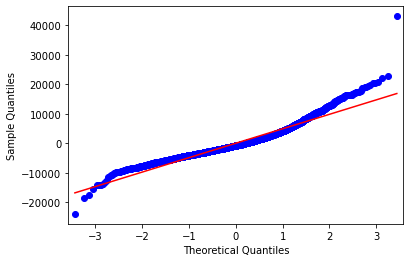

In [102]:

sm.graphics.qqplot(model2.resid, line='s');

#### 14B. Perform Residual Analysis Give The Interpretations.

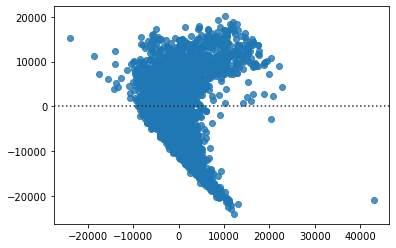

In [103]:

predict_val= olsmodel.fittedvalues.copy()
true_value = df5["Price"].values.copy()
resid = true_value - predict_val
res = sns.residplot(resid,predict_val)
plt.show()


<AxesSubplot:ylabel='Density'>

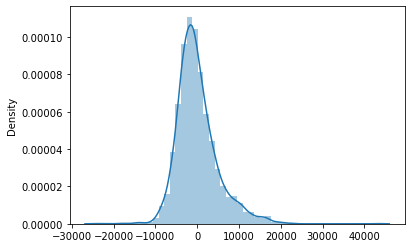

In [104]:
sns.distplot(resid)

## Interpretations
### Error values are normally distributed
### Error values have same variance 

#### 15A. Split The Dataset into Train and Test (80:20) using Sklearn

In [113]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state =42 )

#### 15B. Perform the Linear Regression Model fit using Sklearn.

In [114]:

from sklearn.linear_model import LinearRegression

regr = LinearRegression()

  
regr.fit(X_train, y_train)

LinearRegression()

In [115]:
y_pred = regr.predict(X_test)

In [116]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print("r2 score is" ,score)

r2 score is 0.7154278575248857


            column_name  coeff_value
0               Mileage   -21.780142
1               EngineV  2536.711897
2                  Year   695.209283
3            Brand_Audi  3281.526482
4             Brand_BMW  3815.466291
5   Brand_Mercedes-Benz  2283.597015
6      Brand_Mitsubishi -4158.739636
7         Brand_Renault -4733.619576
8          Brand_Toyota  -123.227901
9      Brand_Volkswagen  -365.002675
10       Body_crossover  4812.262790
11           Body_hatch -1435.644416
12           Body_other   250.580099
13           Body_sedan  -258.772493
14           Body_vagon  -797.013936
15             Body_van -2571.412045
16   Engine Type_Diesel  1027.722473
17      Engine Type_Gas  -793.661583
18    Engine Type_Other   -38.865832
19   Engine Type_Petrol  -195.195059
20      Registration_no -3509.756717
21     Registration_yes  3509.756717


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'Mileage'),
  Text(1, 0, 'EngineV'),
  Text(2, 0, 'Year'),
  Text(3, 0, 'Brand_Audi'),
  Text(4, 0, 'Brand_BMW'),
  Text(5, 0, 'Brand_Mercedes-Benz'),
  Text(6, 0, 'Brand_Mitsubishi'),
  Text(7, 0, 'Brand_Renault'),
  Text(8, 0, 'Brand_Toyota'),
  Text(9, 0, 'Brand_Volkswagen'),
  Text(10, 0, 'Body_crossover'),
  Text(11, 0, 'Body_hatch'),
  Text(12, 0, 'Body_other'),
  Text(13, 0, 'Body_sedan'),
  Text(14, 0, 'Body_vagon'),
  Text(15, 0, 'Body_van'),
  Text(16, 0, 'Engine Type_Diesel'),
  Text(17, 0, 'Engine Type_Gas'),
  Text(18, 0, 'Engine Type_Other'),
  Text(19, 0, 'Engine Type_Petrol'),
  Text(20, 0, 'Registration_no'),
  Text(21, 0, 'Registration_yes')])

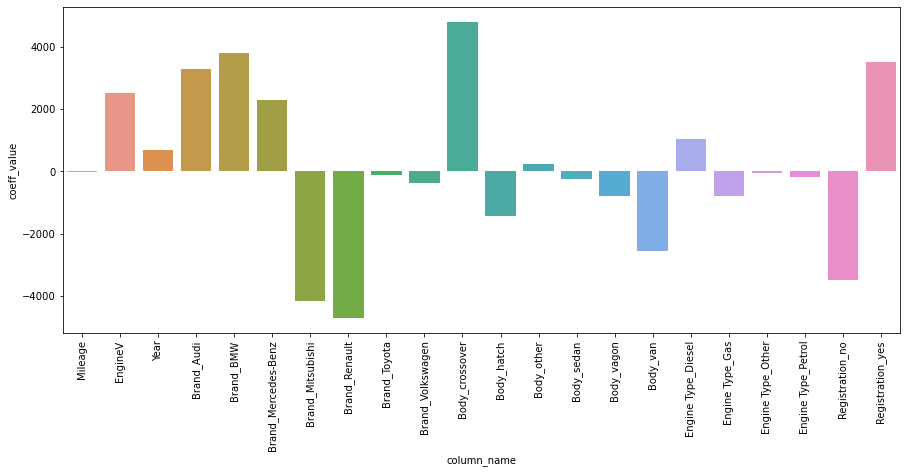

In [125]:
coeff_df = pd.DataFrame()
coeff_df["column_name"] = X_train.columns
coeff_df["coeff_value"] = pd.Series(regr.coef_)
print(coeff_df)
plt.figure(figsize = (15,6))
sns.barplot(coeff_df["column_name"],coeff_df["coeff_value"])
plt.xticks(rotation = 90)

#### 15C. Explain about Lasso Regression and Perform the Lasso Regression

In [129]:

from sklearn.linear_model import Lasso
las = Lasso(alpha = 1)
las.fit(X_train, y_train) 
pred_test_rr= las.predict(X_test)
print("r2 score is",r2_score(y_test, pred_test_rr))

r2 score is 0.7154618109724222


            column_name  coeff_value
0               Mileage   -21.781094
1               EngineV  2544.950133
2                  Year   695.404224
3            Brand_Audi  3394.486070
4             Brand_BMW  3932.696846
5   Brand_Mercedes-Benz  2404.805207
6      Brand_Mitsubishi -4019.100852
7         Brand_Renault -4597.562133
8          Brand_Toyota     0.000000
9      Brand_Volkswagen  -234.465982
10       Body_crossover  5583.043320
11           Body_hatch  -636.777031
12           Body_other  1026.548057
13           Body_sedan   522.391598
14           Body_vagon    -0.000000
15             Body_van -1776.872780
16   Engine Type_Diesel  1209.436426
17      Engine Type_Gas  -596.801449
18    Engine Type_Other   110.069985
19   Engine Type_Petrol    -0.000000
20      Registration_no -7001.412668
21     Registration_yes     0.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'Mileage'),
  Text(1, 0, 'EngineV'),
  Text(2, 0, 'Year'),
  Text(3, 0, 'Brand_Audi'),
  Text(4, 0, 'Brand_BMW'),
  Text(5, 0, 'Brand_Mercedes-Benz'),
  Text(6, 0, 'Brand_Mitsubishi'),
  Text(7, 0, 'Brand_Renault'),
  Text(8, 0, 'Brand_Toyota'),
  Text(9, 0, 'Brand_Volkswagen'),
  Text(10, 0, 'Body_crossover'),
  Text(11, 0, 'Body_hatch'),
  Text(12, 0, 'Body_other'),
  Text(13, 0, 'Body_sedan'),
  Text(14, 0, 'Body_vagon'),
  Text(15, 0, 'Body_van'),
  Text(16, 0, 'Engine Type_Diesel'),
  Text(17, 0, 'Engine Type_Gas'),
  Text(18, 0, 'Engine Type_Other'),
  Text(19, 0, 'Engine Type_Petrol'),
  Text(20, 0, 'Registration_no'),
  Text(21, 0, 'Registration_yes')])

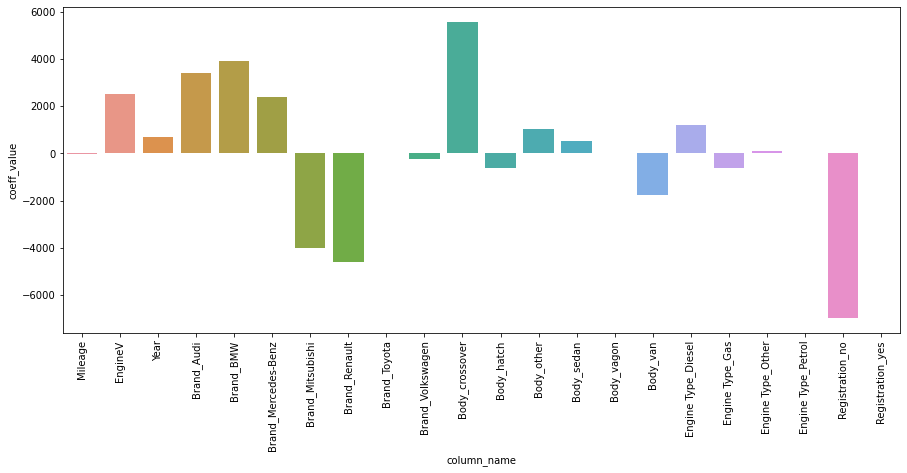

In [130]:
coeff_df = pd.DataFrame()
coeff_df["column_name"] = X_train.columns
coeff_df["coeff_value"] = pd.Series(las.coef_)
print(coeff_df)
plt.figure(figsize = (15,6))
sns.barplot(coeff_df["column_name"],coeff_df["coeff_value"])
plt.xticks(rotation = 90)

#### 15D. Explain about Ridge Regression and Perform the Ridge Regression

In [131]:

from sklearn.linear_model import Ridge
rr = Ridge(alpha = 1)
rr.fit(X_train, y_train) 
pred_test_rr= rr.predict(X_test)
print("r2 score is",r2_score(y_test, pred_test_rr))

r2 score is 0.7154340886506927


            column_name  coeff_value
0               Mileage   -21.787196
1               EngineV  2547.502376
2                  Year   695.316743
3            Brand_Audi  3264.497122
4             Brand_BMW  3800.362553
5   Brand_Mercedes-Benz  2275.079598
6      Brand_Mitsubishi -4136.098758
7         Brand_Renault -4716.951213
8          Brand_Toyota  -122.458326
9      Brand_Volkswagen  -364.430975
10       Body_crossover  4791.851601
11           Body_hatch -1426.691791
12           Body_other   250.445523
13           Body_sedan  -257.191922
14           Body_vagon  -793.499536
15             Body_van -2564.913876
16   Engine Type_Diesel  1024.688950
17      Engine Type_Gas  -792.465496
18    Engine Type_Other   -39.821222
19   Engine Type_Petrol  -192.402232
20      Registration_no -3499.115485
21     Registration_yes  3499.115485


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'Mileage'),
  Text(1, 0, 'EngineV'),
  Text(2, 0, 'Year'),
  Text(3, 0, 'Brand_Audi'),
  Text(4, 0, 'Brand_BMW'),
  Text(5, 0, 'Brand_Mercedes-Benz'),
  Text(6, 0, 'Brand_Mitsubishi'),
  Text(7, 0, 'Brand_Renault'),
  Text(8, 0, 'Brand_Toyota'),
  Text(9, 0, 'Brand_Volkswagen'),
  Text(10, 0, 'Body_crossover'),
  Text(11, 0, 'Body_hatch'),
  Text(12, 0, 'Body_other'),
  Text(13, 0, 'Body_sedan'),
  Text(14, 0, 'Body_vagon'),
  Text(15, 0, 'Body_van'),
  Text(16, 0, 'Engine Type_Diesel'),
  Text(17, 0, 'Engine Type_Gas'),
  Text(18, 0, 'Engine Type_Other'),
  Text(19, 0, 'Engine Type_Petrol'),
  Text(20, 0, 'Registration_no'),
  Text(21, 0, 'Registration_yes')])

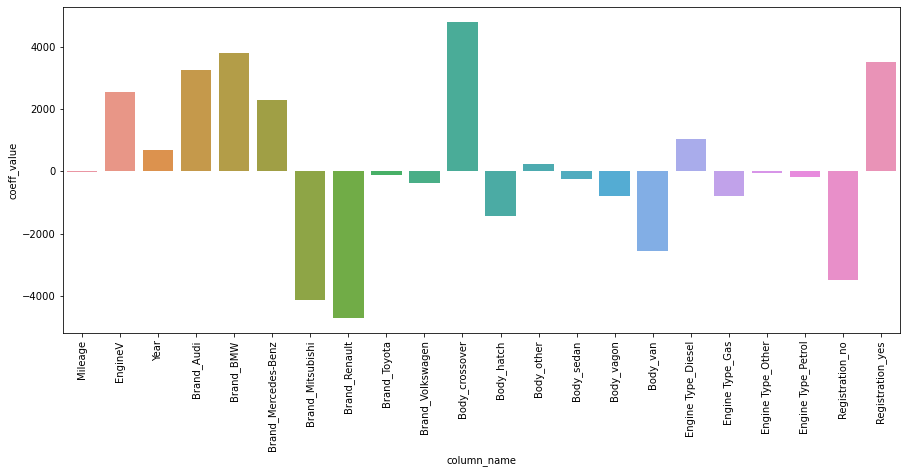

In [132]:
coeff_df = pd.DataFrame()
coeff_df["column_name"] = X_train.columns
coeff_df["coeff_value"] = pd.Series(rr.coef_)
print(coeff_df)
plt.figure(figsize = (15,6))
sns.barplot(coeff_df["column_name"],coeff_df["coeff_value"])
plt.xticks(rotation = 90)

In [135]:
from sklearn.linear_model import Ridge
alpha_val = []
for i in np.linspace(1,5,50):
    rr = Ridge(alpha = i)
    rr.fit(X_train, y_train)
    y_pred_rid = rr.predict(X_test)
    score=r2_score(y_test,y_pred_rid)
    alpha_val.append(i)
    print(score,i)
    

0.7154340886506927 1.0
0.7154343968812475 1.0816326530612246
0.7154346751874925 1.163265306122449
0.715434923638165 1.2448979591836735
0.7154351423018297 1.3265306122448979
0.7154353312468682 1.4081632653061225
0.7154354905414984 1.489795918367347
0.7154356202537595 1.5714285714285714
0.7154357204515209 1.6530612244897958
0.7154357912024734 1.7346938775510203
0.7154358325741468 1.816326530612245
0.7154358446338889 1.8979591836734693
0.7154358274488843 1.9795918367346939
0.7154357810861423 2.061224489795918
0.7154357056125055 2.142857142857143
0.7154356010946481 2.224489795918367
0.7154354675990711 2.3061224489795915
0.7154353051921141 2.387755102040816
0.7154351139399424 2.4693877551020407
0.7154348939085562 2.5510204081632653
0.7154346451637915 2.63265306122449
0.7154343677713164 2.7142857142857144
0.7154340617966304 2.7959183673469385
0.7154337273050745 2.877551020408163
0.7154333643618157 2.9591836734693877
0.7154329730318656 3.0408163265306123
0.715432553380067 3.1224489795918364
0

### Give the Conclusions about the Model fits for What you Observe.

## Interpretations
### Linear regression model  has a goodness/ R2_score of around 71.5% 
### To reduce overfitting Reguralization techniques are used
### In Lasso Regression the coefficients are made to zero which are causing problem